___
# Linear Regression
___

## Importing Libraries

* ### Pandas
    Pandas help us to organize data and manipulate the data by putting it in a tabular form. 
     ([Click Here](https://pandas.pydata.org/))
    
* ### Matplotlib
    Matplotlib is a plotting library for the Python. ([Click Here](https://pandas.pydata.org/))
    
* ### Scikit-Learn
    sklearn library contains a lot of efficient tools for machine learning and statistical modeling. [ClickHere](https://scikit-learn.org/)
    
 [packages included in anaconda](https://docs.anaconda.com/anaconda/packages/old-pkg-lists/4.3.1/py35/)

## Importing Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

### Reading the csv file

In [2]:
df=pd.read_csv('Price_Predection.csv')

In [3]:
df.head()

,area,price
0,2500,550000
1,2700,550000
2,3000,565000
3,3200,610000
4,3400,640000


### Plotting the data

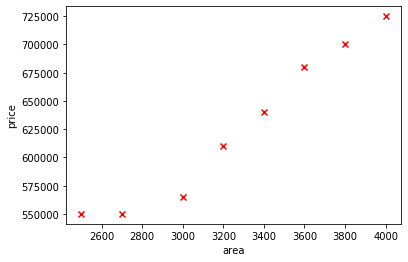

In [4]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='x')

### Splitting the data into input and output

In [5]:
area_df=df.drop('price',axis='columns')

In [6]:
area_df.head()

,area
0,2500
1,2700
2,3000
3,3200
4,3400


In [7]:
price=df.price

In [8]:
price.head()

0    550000
1    550000
2    565000
3    610000
4    640000
Name: price, dtype: int64

## Creating and Training the model

In [9]:
reg=linear_model.LinearRegression()

In [10]:
reg.fit(area_df,price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predicting for new value

In [11]:
reg.predict([[2800]])

array([566007.75193798])

In [12]:
reg.predict([[3500]])

array([656627.90697674])

In [13]:
predict=reg.predict(df[['area']])
predict

array([527170.54263566, 553062.01550388, 591899.2248062 , 617790.69767442,
       643682.17054264, 669573.64341085, 695465.11627907, 721356.58914729])

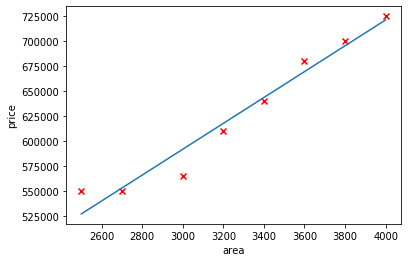

In [14]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='x')
plt.plot(area_df,predict)

## Evaluation

In [15]:
from sklearn import metrics

* Calculating the mean squared error

 * $\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$
 
  Calculating the cost for the predicted price

In [16]:
metrics.mean_squared_error(price,predict)

183866279.0697669

_____

# Linear regression with multiple variables
_____

* Housing data

    Dataset from kaggle [Source file](https://www.kaggle.com/vedavyasv/usa-housing/data#)

In [17]:
Housing=pd.read_csv("USA_Housing.csv")

In [18]:
Housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386




* Removing the address part so that it will be easy for us to work with numerical data

In [19]:
Housing.drop('Address',axis='columns').head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


* Selecting the features according to our own

In [20]:
 x=Housing[['Avg. Area Income', 'Avg. Area House Age', 'Area Population']]

In [21]:
x.head()

,Avg. Area Income,Avg. Area House Age,Area Population
0,79545.458574,5.682861,23086.800503
1,79248.642455,6.002900,40173.072174
2,61287.067179,5.865890,36882.159400
3,63345.240046,7.188236,34310.242831
4,59982.197226,5.040555,26354.109472


In [22]:
y=Housing['Price']

In [23]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

* splitting the data into training and test set

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [26]:
mulreg=linear_model.LinearRegression()

## Fitting the model

In [27]:
mulreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predictions

In [28]:
predict=mulreg.predict(x_test)

## Evaluation

* Importing metrics for Evaluation

In [29]:
from sklearn import metrics

* Calculating the mean squared error

 * $\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$
 
  Evaluation using output of the test set to the predections to calculate the error

In [30]:
metrics.mean_squared_error(y_test,predict)

26589302560.161945

____
# Exercise
_____

## Salary Predection Linear Regression

Data set from kaggle [Source file](https://www.kaggle.com/harsh45/random-salary-data-of-employes-age-wise)

### Read the csv file 'Salary_Data.csv'

### Plot the data

* ### Output
![](Scatterplot.png)

### Split the input and output

### Import Linear Regression and fit the model

### Predict the model

### Plot the model

* ### Output

![Prediction Plot](Salary_for_Experience_plot.png)